**Task 3**

**Exploratory Data Analysis - Retail**

**Data set name - SampleSuperstore**

**In this task we will try to find out the weak areas where we can work to make more profit for our retail.**

**Done by Pratik Khedkar**

In [1]:
# Import important libarries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

# To ignore the warnings 
import warnings as wg

In [2]:
# Importing the dataset using pandas

df = pd.read_csv("SampleSuperstore.csv")

# This time to check our data and print 5 rows from our dataset
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# to find last 5 rows

df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [4]:
# For finding any randam 5 sample of data rows.

df.sample(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9158,Standard Class,Corporate,United States,Bangor,Maine,4401,East,Technology,Accessories,255.420,9,0.0,104.7222
5416,Standard Class,Consumer,United States,Chicago,Illinois,60653,Central,Technology,Phones,39.984,2,0.2,-8.9964
931,First Class,Consumer,United States,Toledo,Ohio,43615,East,Office Supplies,Paper,13.872,3,0.2,5.0286
3320,Standard Class,Consumer,United States,Columbia,Tennessee,38401,South,Furniture,Chairs,662.880,3,0.2,74.5740
7056,Same Day,Consumer,United States,Anaheim,California,92804,West,Office Supplies,Binders,122.688,9,0.2,39.8736


**Preprocessing of data**

In [5]:
# Shape of the data
df.shape 

(9994, 13)

In [6]:
# Columns inside the dataset

df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
# Number of unique values in each columns

for i in df.columns:
    print(i,len(df[i].unique()))

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


In [8]:
#For the check of null values

df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
# overall information about the data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
# Statistical overview of data.

df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
# Checking for duplicate values.

df.duplicated().sum()

17

In [12]:
# Dropping the duplicates.

df.drop_duplicates()
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
# removing the unnecessary columns such as postal code.

dataset = df.drop(['Postal Code'],axis = 1)

In [14]:
dataset.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Data Visualization**

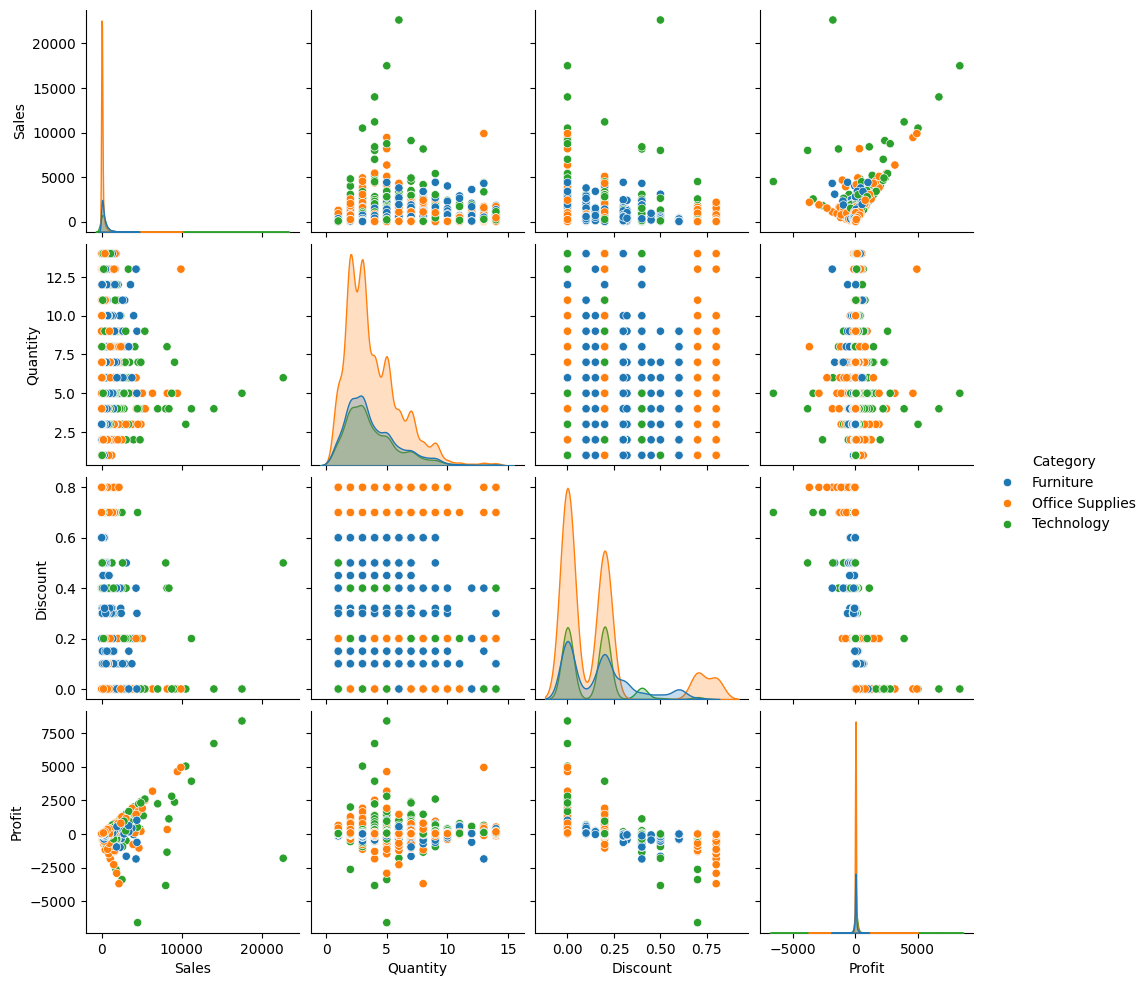

In [15]:
# Visualizing the dataset using the pair plot

sns.pairplot(dataset, hue = "Category")

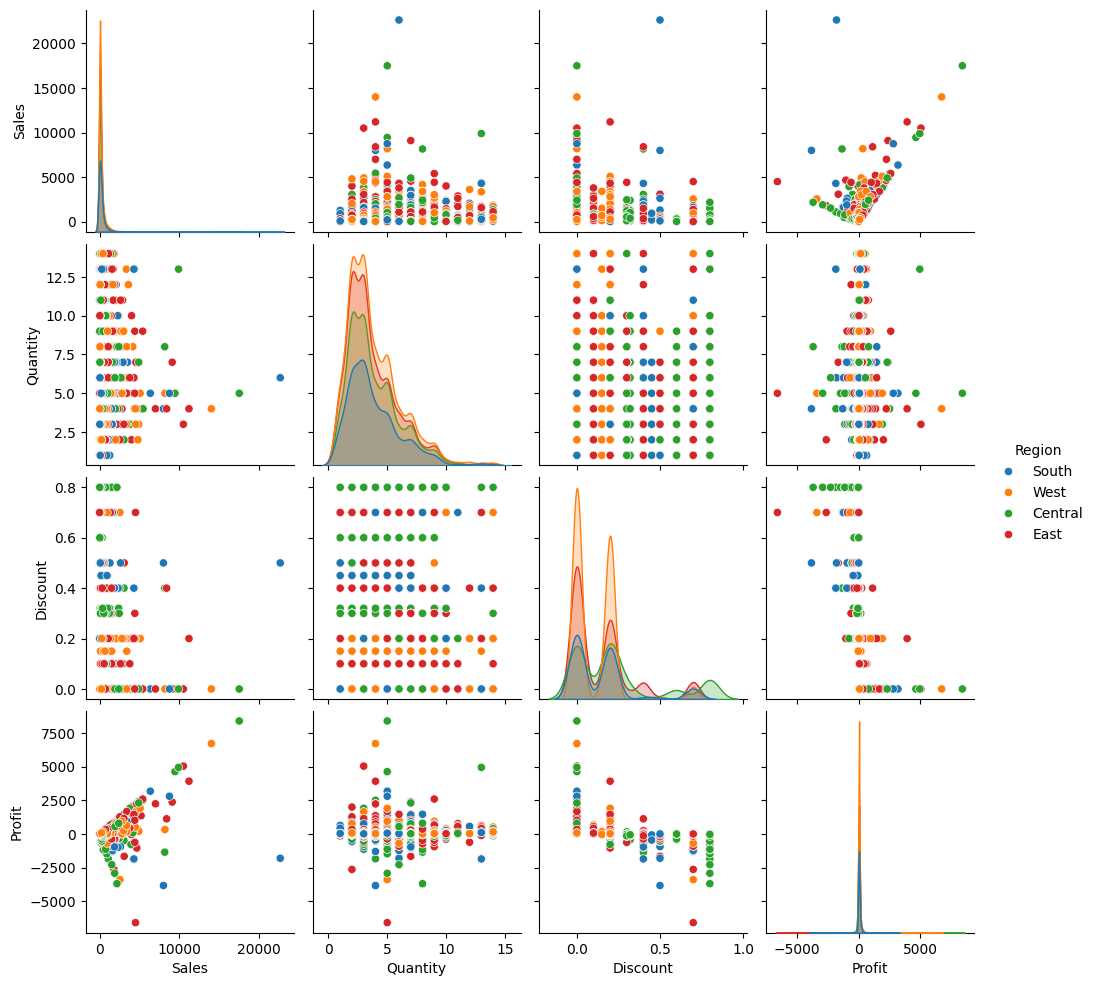

In [16]:
sns.pairplot(dataset, hue = "Region")

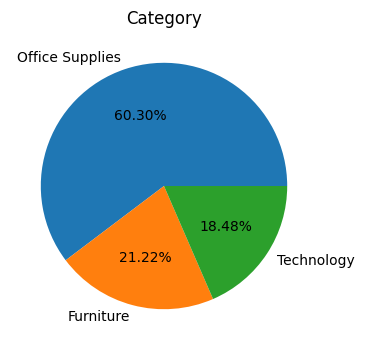

In [17]:
# Count of plot, category wise Analysis.

plt.figure(figsize = (4,4))
plt.title('Category')
plt.pie(dataset['Category'].value_counts(), labels=dataset['Category'].value_counts().index,autopct='%.2f%%')

plt.show()

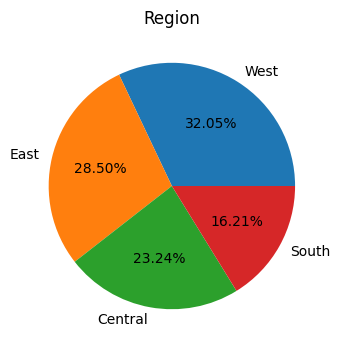

In [18]:
# Count of plot that is region wise distribution.
plt.figure(figsize = (4,4))
plt.title('Region')
plt.pie(dataset['Region'].value_counts(), labels = dataset['Region'].value_counts().index, autopct = '%.2f%%')

plt.show()

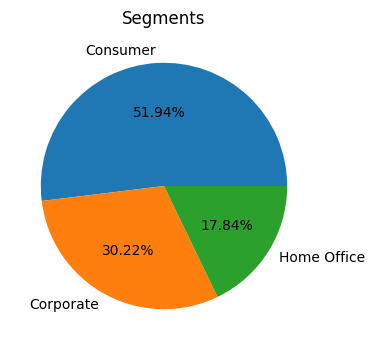

In [19]:
# Count of plot, customer wise distribution/segments.

plt.figure(figsize = (4,4))
plt.title('Segments')
plt.pie(dataset['Segment'].value_counts(), labels = dataset['Segment'].value_counts().index, autopct = '%.2f%%')

plt.show()

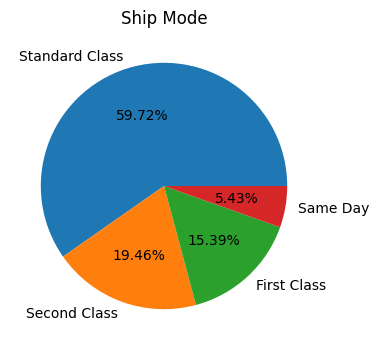

In [20]:
# Count of plot,ship wise distribution.

plt.figure(figsize = (4,4))
plt.title('Ship Mode')
plt.pie(dataset['Ship Mode'].value_counts(), labels = dataset['Ship Mode'].value_counts().index, autopct = '%.2f%%')

plt.show()

***Segment-wise analysis of Profit, Sale & Discount for above distridution***

In [21]:
dataset.groupby(['Segment'])[['Sales', 'Discount', 'Profit']].mean()

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


***Quantity wise analysis of Profit, Sales & Discount for above distribution***

In [22]:
dataset.groupby(['Quantity'])[['Sales', 'Discount', 'Profit']].mean()

,Sales,Discount,Profit
Quantity,,,
1,59.234632,0.152959,8.276396
2,120.354488,0.154858,16.006831
3,175.201578,0.153329,23.667715
4,271.764059,0.157708,37.131310
5,337.936339,0.157146,40.257394
6,362.101960,0.166556,18.051517
7,395.888393,0.161980,56.579163
8,458.210802,0.171595,42.244342
9,498.083683,0.147946,68.557716


Text(0.5, 1.0, 'Region-wise ordered Quantity')

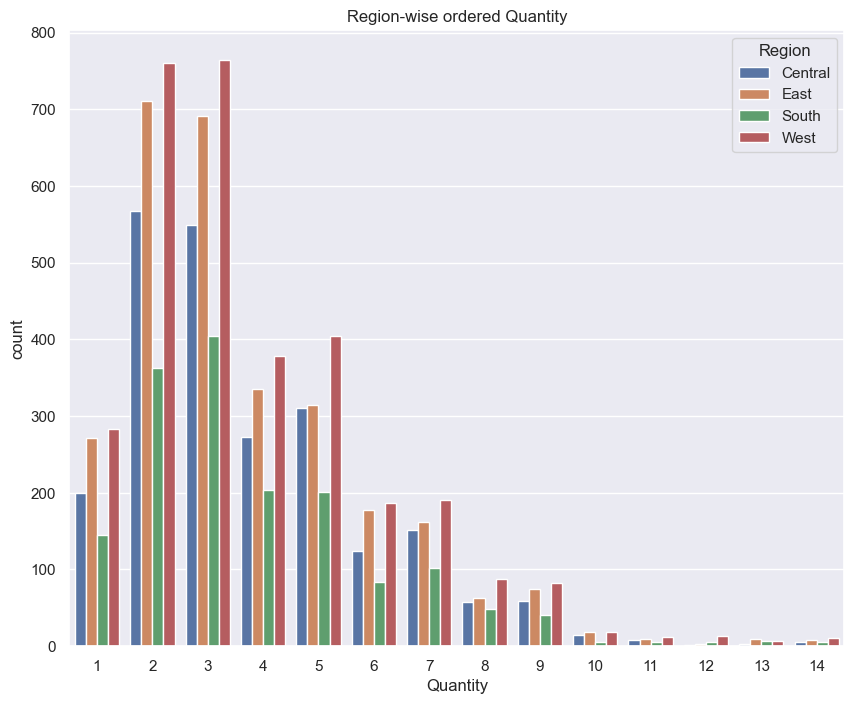

In [23]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.countplot(x = dataset['Quantity'], hue = dataset['Region'])

plt.title('Region-wise ordered Quantity')

Text(0.5, 1.0, 'Region-wise ordered product categories')

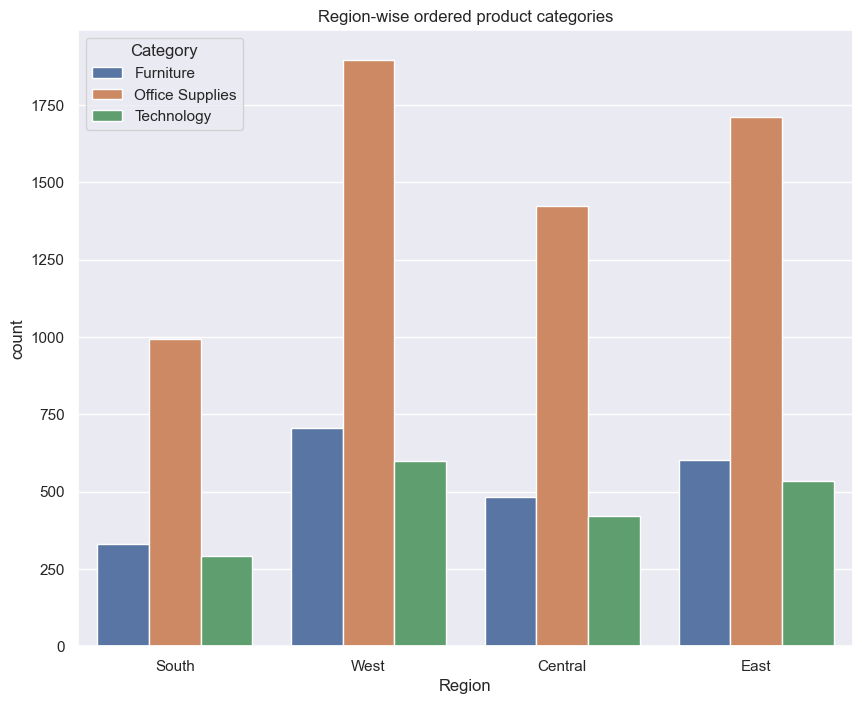

In [24]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.countplot(x = dataset['Region'], hue = dataset['Category'])

plt.title('Region-wise ordered product categories')

***Conclusion :- We can see in above graph west region has orderd more all kind of products and south region is our least buyer.***

**Category wise analysis of Profit, Sales & Discount**

In [25]:
dataset.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


In [26]:
# Computing top categories in terms of sales.

s = dataset.groupby("Category").Sales.sum()

In [27]:
# Computing top categories in terms of profit. 

p = dataset.groupby("Category").Profit.sum()

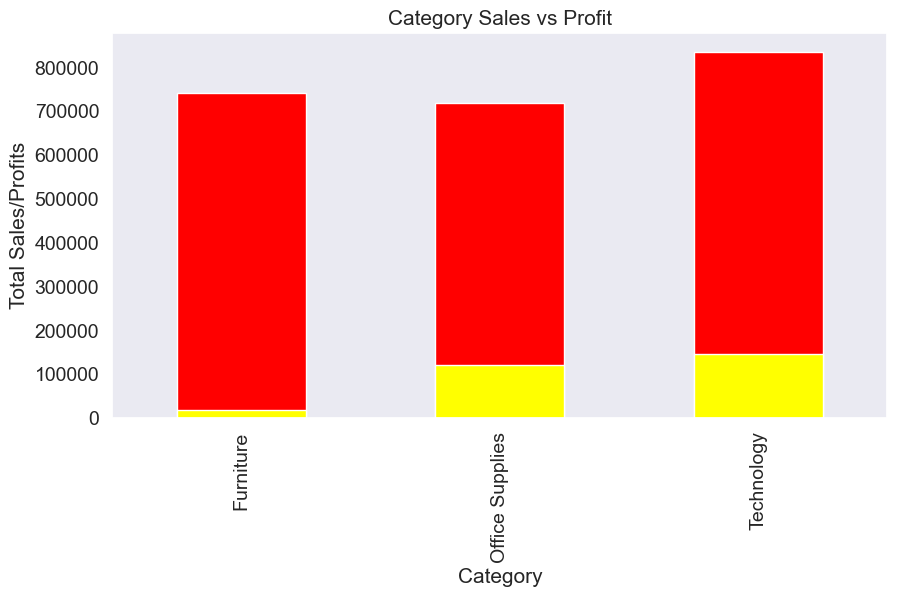

In [28]:
# Plotting to see it visually.

sns.set_style('dark')

s.plot(kind='bar', figsize=(10, 5), fontsize=14, color='red')
p.plot(kind='bar', figsize=(10, 5), fontsize=14, color='yellow')

plt.xlabel('Category', fontsize=15)
plt.ylabel('Total Sales/Profits', fontsize=15)
plt.title("Category Sales vs Profit", fontsize=15)

plt.show()


**Sub category Wise analysis of Profit, Sales & Discount**

In [29]:
dataset.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit']].mean()

,Sales,Discount,Profit
Sub-Category,,,
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758
Art,34.068834,0.074874,8.200737
Binders,133.560560,0.372292,19.843574
Bookcases,503.859633,0.211140,-15.230509
Chairs,532.332420,0.170178,43.095894
Copiers,2198.941618,0.161765,817.909190
Envelopes,64.867724,0.080315,27.418019
Fasteners,13.936774,0.082028,4.375660


Text(0.5, 1.0, 'Sub-Category')

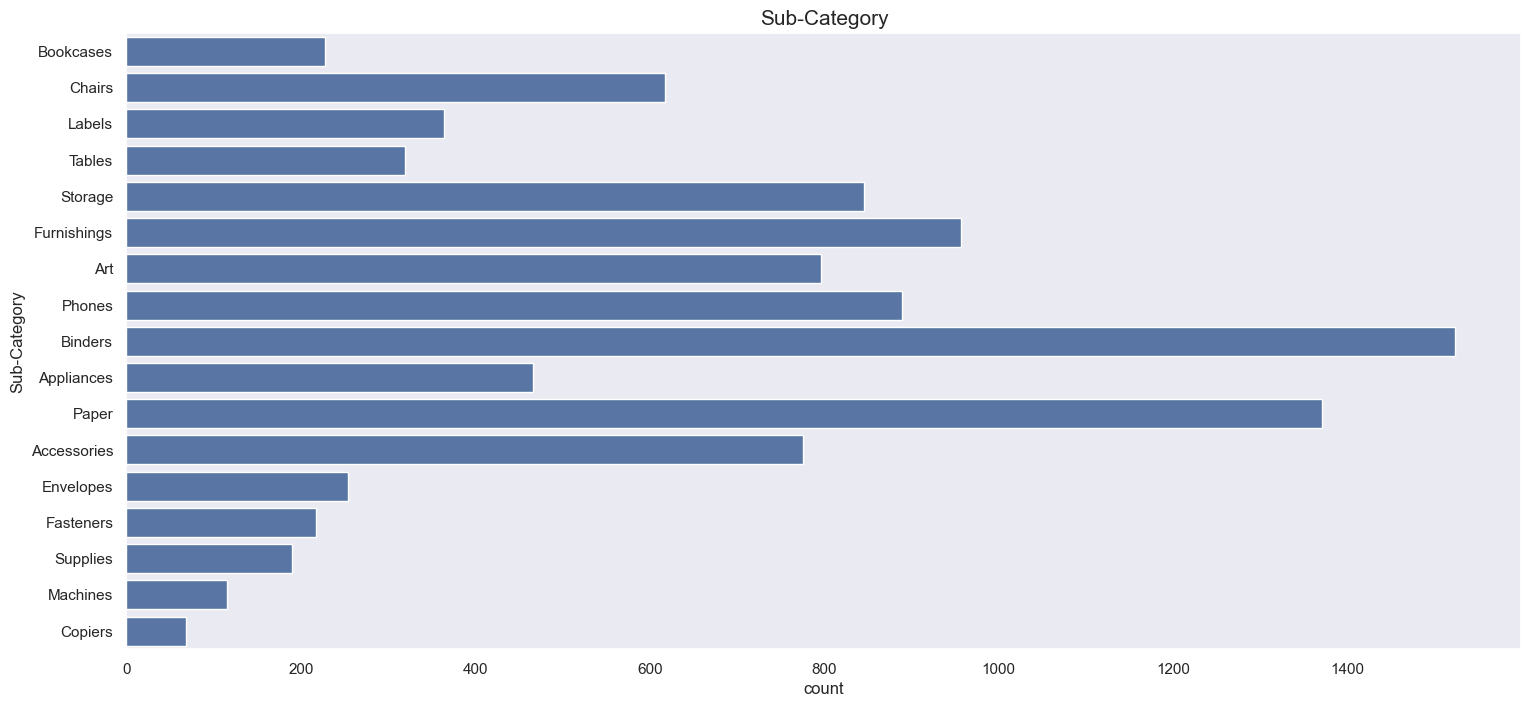

In [30]:
# Now turn to draw a graph of sub-category

plt.figure(figsize=(18,8))
sns.countplot(df['Sub-Category'])
plt.title('Sub-Category',fontsize=15)

In [31]:
# Computing top sub-categories in terms of sales.

sc = dataset.groupby("Sub-Category").Sales.sum()

In [32]:
# Computing top sub-categories in terms of profit.

scp = dataset.groupby("Sub-Category").Profit.sum()

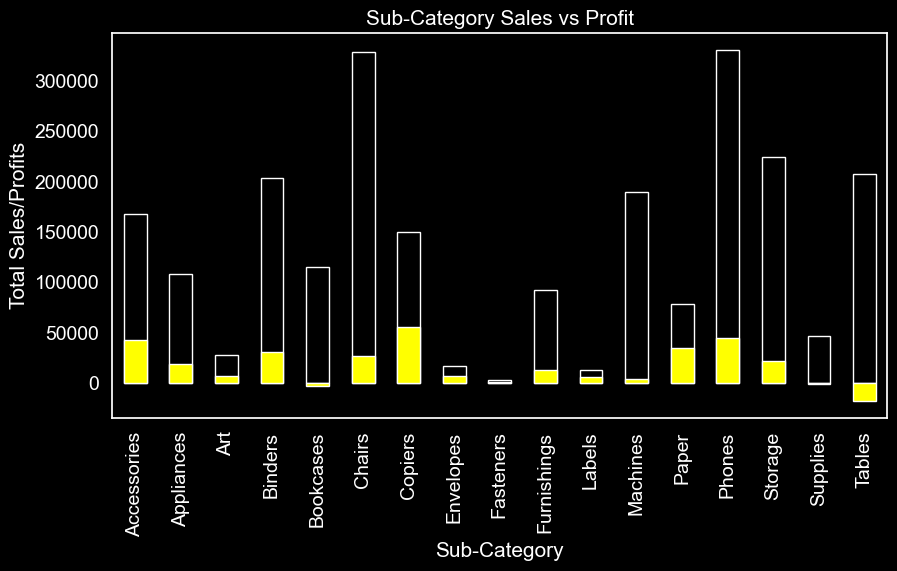

In [33]:
# Plotting to see it visually.

plt.style.use('dark_background')  # Use 'dark_background' instead of 'dark'

# Your plotting code
sc.plot(kind='bar', figsize=(10, 5), fontsize=14, color='black')
scp.plot(kind='bar', figsize=(10, 5), fontsize=14, color='yellow')

plt.xlabel('Sub-Category', fontsize=15)
plt.ylabel('Total Sales/Profits', fontsize=15)
plt.title("Sub-Category Sales vs Profit", fontsize=15)

plt.show()

<Axes: ylabel='Sub-Category'>

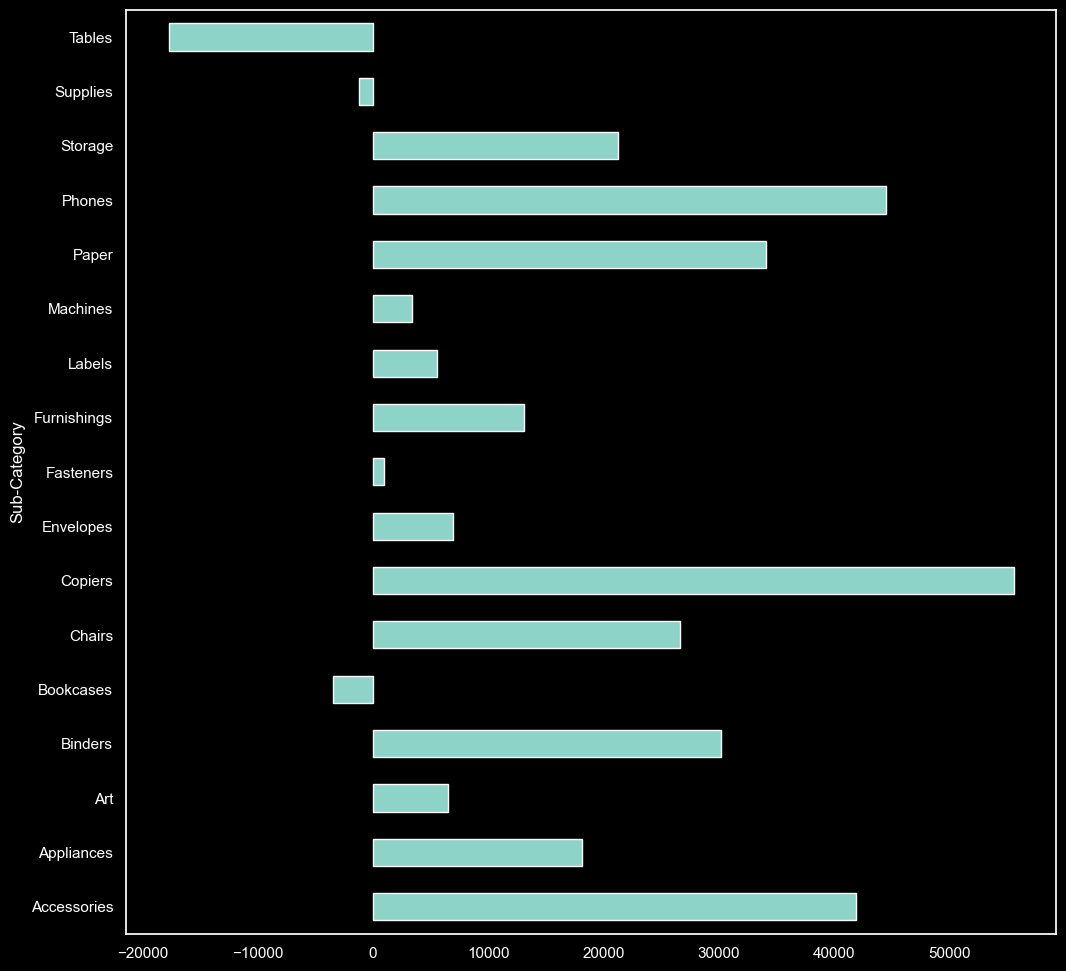

In [34]:
# A more detailed view

plt.figure(figsize=(12,12))
statewise = dataset.groupby(['Sub-Category'])['Profit'].sum()
statewise.plot.barh() 
# h for horizontal 

***Conclusion :- The above graph clearly shows that Copiers and Phones have the highest sales and profit where as tables has negative profit.***

In [39]:
# State- wise Analysis
new_df=dataset['State'].value_counts()
new_df.head()

State
California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Name: count, dtype: int64

In [40]:
min=dataset['State'].value_counts().min()
min

1

In [41]:
max=dataset['State'].value_counts().max()
max

2001

***State wise analysis of Profit, Sales & Discount.***

In [42]:
dataset.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


Text(0.5, 1.0, 'states-wise Dealings')

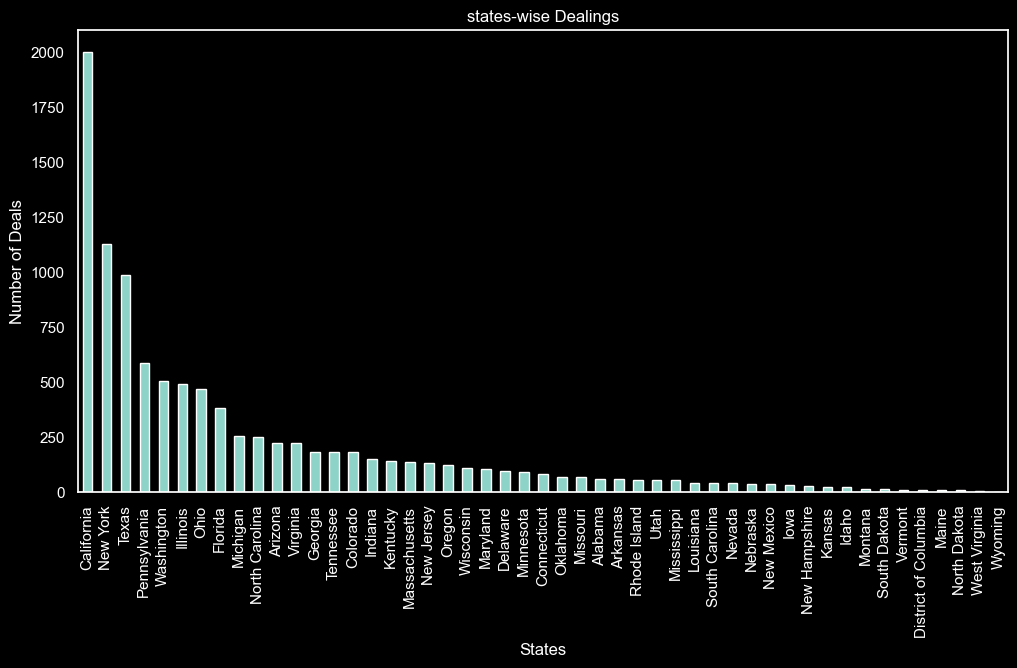

In [43]:
new_df.plot(kind='bar',figsize=(12,6))

plt.ylabel('Number of Deals')
plt.xlabel('States')
plt.title('states-wise Dealings')

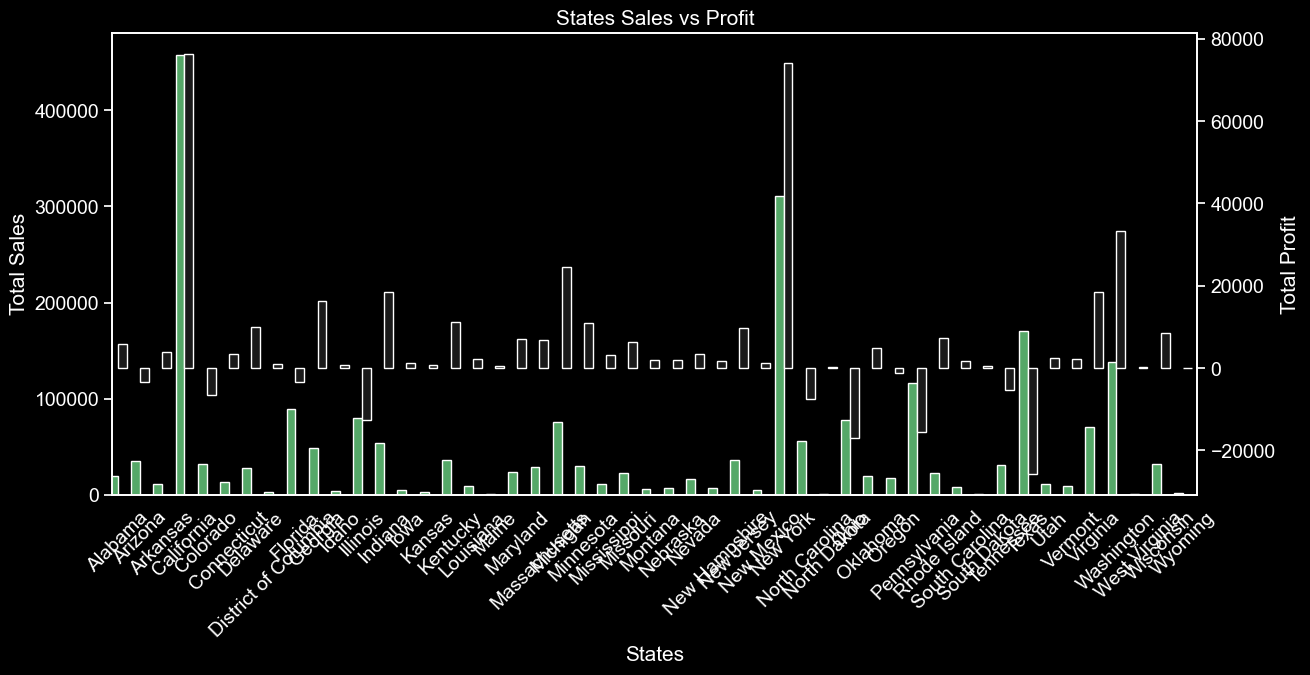

In [45]:
# Computing states in terms of sales 
ss = dataset.groupby("State").Sales.sum()

# Computing states in terms of profit 
ps = dataset.groupby("State").Profit.sum()

# Set up figure and axis
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot sales on primary y-axis
ss.plot(kind='bar', ax=ax1, color='g', width=0.4, position=1, fontsize=14)
ax1.set_ylabel('Total Sales', fontsize=15)
ax1.set_xlabel('States', fontsize=15)
ax1.tick_params(axis='x', rotation=45)

# Create a secondary y-axis for profit
ax2 = ax1.twinx()
ps.plot(kind='bar', ax=ax2, color='k', width=0.4, position=0, fontsize=14)
ax2.set_ylabel('Total Profit', fontsize=15)

plt.title("States Sales vs Profit", fontsize=15)
plt.show()

***Final conclusion :-***
**Weak Areas :-
i) We should limit sales of furniture and increase that of technology and office suppliers as furniture has very less profit as compared to sales.
ii) Increase sales in the east as there is more profit.
iii) Need to give some discount and other offer in state like colorado, texas, north carolina, ohio etc because there are sale in that area but there no profit.**

**Other Findings :
i) Less quantity of products additionally the sales are very high.
ii) The features Profit and Discounts are highly related.
iii) The Home Office provides highest sales followed by Corporate by a slight variation.
iv) We should concentrate on the states like 'New York' and 'California' to make more profits.**